##ЛР3. Задача классификации

[12 баллов]

## О формате сдачи (все ЛР)

🔷 **<font color='plum'>При решении используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, могут помечаться фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличие работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, могут помечаться фразами "Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Выводы подразумевают текстовый (письменный, не устный) ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

🔷 **<font color='plum'>Устная защита</font>**

    ❌❌❌ Если не пройдена устная защита по ЛР, то баллы не начисляются вовсе
    (вопросы устной защиты охватывают лекционный материал и практический материал по заданиям ЛР, список вопросов не публикуется)

## Этапы

<font color='DarkOrange'>**Задание 1 [баллов: 2]:**</font>

Выберите датасет и задачу для него (классификация) - с Kaggle или UCI Machine Learning Repository (https://archive.ics.uci.edu/datasets).
Важно: используйте более новые датасеты, кол-во объектов не менее 100.
Лучше воспользоваться датасетом из предыдущих ЛР.

Выберите (или сгенерите сами) признак, который будет целевым для бинарной классификации.

Используйте LogisticRegression из sklearn. Задайте несколько параметров метода самостоятельно, поясните их назначение и причину выбора конкретных значений.
Используйте несколько метрик, чтоб оценить результаты бинарной классификации (метрики, доступные в sklearn).

In [45]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load your data
data = pd.read_csv('top_10000_1950-now.csv')

print("Dataset shape:", data.shape)
print("Available columns:", data.columns.tolist())

Dataset shape: (10000, 35)
Available columns: ['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)', 'Album URI', 'Album Name', 'Album Artist URI(s)', 'Album Artist Name(s)', 'Album Release Date', 'Album Image URL', 'Disc Number', 'Track Number', 'Track Duration (ms)', 'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added By', 'Added At', 'Artist Genres', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Album Genres', 'Label', 'Copyrights']


In [46]:
# Let's create a binary target: High Energy vs Low Energy songs
# We'll use the 'Energy' column to create our binary classification target

# Create binary target: 1 for high energy, 0 for low energy
energy_median = data['Energy'].median()
data['target'] = (data['Energy'] > energy_median).astype(int)
print(f"Created binary target based on Energy (median: {energy_median:.3f})")


print("Target distribution:")
print(data['target'].value_counts())
print(f"Proportion of class 1: {data['target'].mean():.3f}")

Created binary target based on Energy (median: 0.713)
Target distribution:
target
0    5011
1    4989
Name: count, dtype: int64
Proportion of class 1: 0.499


In [47]:
# Select numerical audio features for classification
audio_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 
                  'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# Check which features actually exist in your dataset
available_features = [feat for feat in audio_features if feat in data.columns]
print("Available audio features:", available_features)

# Prepare features (X) and target (y)
X = data[available_features]
y = data['target']

# Handle missing values if any
X = X.fillna(X.mean())

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Available audio features: ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
Features shape: (10000, 9)
Target shape: (10000,)


In [48]:
from sklearn.model_selection import cross_validate, StratifiedKFold

# Use Stratified K-Fold Cross-Validation instead of train-test split
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Using 5-fold Stratified Cross-Validation")
print(f"Data shape: {X_scaled.shape}")
print(f"Will create {cv.get_n_splits()} folds")

# Initialize the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Perform cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring, return_train_score=False)

print("\nCross-Validation Results:")
print(f"Accuracy:  {cv_results['test_accuracy'].mean():.4f} (±{cv_results['test_accuracy'].std():.4f})")
print(f"Precision: {cv_results['test_precision'].mean():.4f} (±{cv_results['test_precision'].std():.4f})")
print(f"Recall:    {cv_results['test_recall'].mean():.4f} (±{cv_results['test_recall'].std():.4f})")
print(f"F1-Score:  {cv_results['test_f1'].mean():.4f} (±{cv_results['test_f1'].std():.4f})")
print(f"ROC-AUC:   {cv_results['test_roc_auc'].mean():.4f} (±{cv_results['test_roc_auc'].std():.4f})")

Using 5-fold Stratified Cross-Validation
Data shape: (10000, 9)
Will create 5 folds

Cross-Validation Results:
Accuracy:  0.9977 (±0.0011)
Precision: 0.9966 (±0.0021)
Recall:    0.9988 (±0.0012)
F1-Score:  0.9977 (±0.0011)
ROC-AUC:   1.0000 (±0.0000)


In [49]:
# Initialize multiple Logistic Regression models with different parameters
models = {
    'LR_Default': LogisticRegression(random_state=42, max_iter=1000),
    'LR_L2_Reg': LogisticRegression(penalty='l2', C=1.0, random_state=42, max_iter=1000),
    'LR_L1_Reg': LogisticRegression(penalty='l1', C=0.1, solver='liblinear', random_state=42, max_iter=1000),
    'LR_High_Reg': LogisticRegression(penalty='l2', C=0.01, random_state=42, max_iter=1000),
    'LR_Balanced': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
}

# Train all models using cross-validation and store results
results = {}

for name, model in models.items():
    print(f"\n--- Evaluating {name} with Cross-Validation ---")
    
    # Perform cross-validation
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    cv_results = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring, return_train_score=False)
    
    # Calculate mean and std of metrics across all folds
    accuracy = cv_results['test_accuracy'].mean()
    precision = cv_results['test_precision'].mean()
    recall = cv_results['test_recall'].mean()
    f1 = cv_results['test_f1'].mean()
    roc_auc = cv_results['test_roc_auc'].mean()
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'accuracy_std': cv_results['test_accuracy'].std(),
        'precision': precision,
        'precision_std': cv_results['test_precision'].std(),
        'recall': recall,
        'recall_std': cv_results['test_recall'].std(),
        'f1': f1,
        'f1_std': cv_results['test_f1'].std(),
        'roc_auc': roc_auc,
        'roc_auc_std': cv_results['test_roc_auc'].std(),
        'cv_results': cv_results
    }
    
    print(f"Accuracy:  {accuracy:.4f} (±{cv_results['test_accuracy'].std():.4f})")
    print(f"Precision: {precision:.4f} (±{cv_results['test_precision'].std():.4f})")
    print(f"Recall:    {recall:.4f} (±{cv_results['test_recall'].std():.4f})")
    print(f"F1-Score:  {f1:.4f} (±{cv_results['test_f1'].std():.4f})")
    print(f"ROC-AUC:   {roc_auc:.4f} (±{cv_results['test_roc_auc'].std():.4f})")


--- Evaluating LR_Default with Cross-Validation ---
Accuracy:  0.9977 (±0.0011)
Precision: 0.9966 (±0.0021)
Recall:    0.9988 (±0.0012)
F1-Score:  0.9977 (±0.0011)
ROC-AUC:   1.0000 (±0.0000)

--- Evaluating LR_L2_Reg with Cross-Validation ---
Accuracy:  0.9977 (±0.0011)
Precision: 0.9966 (±0.0021)
Recall:    0.9988 (±0.0012)
F1-Score:  0.9977 (±0.0011)
ROC-AUC:   1.0000 (±0.0000)

--- Evaluating LR_L1_Reg with Cross-Validation ---
Accuracy:  0.9978 (±0.0014)
Precision: 0.9956 (±0.0028)
Recall:    1.0000 (±0.0000)
F1-Score:  0.9978 (±0.0014)
ROC-AUC:   1.0000 (±0.0000)

--- Evaluating LR_High_Reg with Cross-Validation ---
Accuracy:  0.9652 (±0.0029)
Precision: 0.9518 (±0.0051)
Recall:    0.9800 (±0.0033)
F1-Score:  0.9656 (±0.0028)
ROC-AUC:   0.9966 (±0.0006)

--- Evaluating LR_Balanced with Cross-Validation ---
Accuracy:  0.9977 (±0.0011)
Precision: 0.9966 (±0.0021)
Recall:    0.9988 (±0.0012)
F1-Score:  0.9977 (±0.0011)
ROC-AUC:   1.0000 (±0.0000)


# Parameter Explanations

## 📊 LR_Default
- **Parameters**: Default settings
- **Explanation**: Uses L2 regularization with C=1.0, good starting point
- **Reason for choice**: Baseline for comparison

## 📊 LR_L2_Reg
- **Parameters**: `penalty="l2", C=1.0`
- **Explanation**: L2 regularization (Ridge) prevents overfitting by penalizing large coefficients
- **Reason for choice**: Standard regularization approach, works well for correlated features

## 📊 LR_L1_Reg
- **Parameters**: `penalty="l1", C=0.1, solver="liblinear"`
- **Explanation**: L1 regularization (Lasso) can perform feature selection by driving some coefficients to zero
- **Reason for choice**: Useful for identifying most important features, C=0.1 gives stronger regularization

## 📊 LR_High_Reg
- **Parameters**: `penalty="l2", C=0.01`
- **Explanation**: Strong L2 regularization with small C value (inverse of regularization strength)
- **Reason for choice**: Test performance with high regularization to prevent overfitting

## 📊 LR_Balanced
- **Parameters**: `class_weight="balanced"`
- **Explanation**: Automatically adjusts weights inversely proportional to class frequencies
- **Reason for choice**: Useful if classes are imbalanced (though your data is balanced)

<font color='DarkOrange'>**Задание 2 [баллов: 2]:**</font>

Выполните бинарную классификацию аналогично тпредыдущему пункту с использованием SVM (SVC из sklearn, используйте kernel=‘linear’, сами подберите параметр регуляризации С и ответьте на вопрос, может ли/как может SVM учесть несбалансированность классов)


In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Prepare data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Regularization parameter C values to test
c_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# SVM models with different parameters
svm_models = {}
svm_results = {}

print("="*70)
print("SVM CLASSIFICATION WITH DIFFERENT REGULARIZATION PARAMETERS")
print("="*70)

for c_val in c_values:
    model_name = f'SVM_C_{c_val}'
    
    # SVM model with linear kernel
    svm_model = SVC(kernel='linear', C=c_val, random_state=42, probability=True)
    svm_models[model_name] = svm_model
    
    # Cross-validation
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    cv_results = cross_validate(svm_model, X_scaled, y, cv=cv, scoring=scoring, return_train_score=False)
    
    # Store results
    svm_results[model_name] = {
        'accuracy_mean': np.mean(cv_results['test_accuracy']),
        'accuracy_std': np.std(cv_results['test_accuracy']),
        'precision_mean': np.mean(cv_results['test_precision']),
        'precision_std': np.std(cv_results['test_precision']),
        'recall_mean': np.mean(cv_results['test_recall']),
        'recall_std': np.std(cv_results['test_recall']),
        'f1_mean': np.mean(cv_results['test_f1']),
        'f1_std': np.std(cv_results['test_f1']),
        'roc_auc_mean': np.mean(cv_results['test_roc_auc']),
        'roc_auc_std': np.std(cv_results['test_roc_auc'])
    }
    
    print(f"{model_name:15} | Accuracy: {svm_results[model_name]['accuracy_mean']:.4f} (±{svm_results[model_name]['accuracy_std']:.4f}) | "
          f"F1: {svm_results[model_name]['f1_mean']:.4f} | ROC-AUC: {svm_results[model_name]['roc_auc_mean']:.4f}")

# Find best C parameter
best_model_name = max(svm_results.keys(), key=lambda x: svm_results[x]['f1_mean'])
best_c = float(best_model_name.split('_')[-1])
print(f"\n🎯 Best parameter: C = {best_c}")

# Test SVM with class weighting for imbalanced data
print("\n" + "="*70)
print("SVM WITH CLASS WEIGHTING (Handling Class Imbalance)")
print("="*70)

# SVM with class weighting
svm_balanced = SVC(kernel='linear', C=best_c, class_weight='balanced', random_state=42, probability=True)
cv_results_balanced = cross_validate(svm_balanced, X_scaled, y, cv=cv, scoring=scoring, return_train_score=False)

print(f"SVM Balanced | Accuracy: {np.mean(cv_results_balanced['test_accuracy']):.4f} | "
      f"Precision: {np.mean(cv_results_balanced['test_precision']):.4f} | "
      f"Recall: {np.mean(cv_results_balanced['test_recall']):.4f} | "
      f"F1: {np.mean(cv_results_balanced['test_f1']):.4f}")

# Compare with regular SVM
regular_results = svm_results[f'SVM_C_{best_c}']
print(f"SVM Regular  | Accuracy: {regular_results['accuracy_mean']:.4f} | "
      f"Precision: {regular_results['precision_mean']:.4f} | "
      f"Recall: {regular_results['recall_mean']:.4f} | "
      f"F1: {regular_results['f1_mean']:.4f}")

SVM CLASSIFICATION WITH DIFFERENT REGULARIZATION PARAMETERS
SVM_C_0.001     | Accuracy: 0.9415 (±0.0052) | F1: 0.9432 | ROC-AUC: 0.9916
SVM_C_0.01      | Accuracy: 0.9823 (±0.0024) | F1: 0.9823 | ROC-AUC: 0.9990
SVM_C_0.1       | Accuracy: 0.9952 (±0.0012) | F1: 0.9952 | ROC-AUC: 0.9999
SVM_C_1.0       | Accuracy: 0.9976 (±0.0011) | F1: 0.9976 | ROC-AUC: 1.0000
SVM_C_10.0      | Accuracy: 0.9980 (±0.0010) | F1: 0.9980 | ROC-AUC: 1.0000
SVM_C_100.0     | Accuracy: 0.9987 (±0.0005) | F1: 0.9987 | ROC-AUC: 1.0000

🎯 Best parameter: C = 100.0

SVM WITH CLASS WEIGHTING (Handling Class Imbalance)
SVM Balanced | Accuracy: 0.9987 | Precision: 0.9982 | Recall: 0.9992 | F1: 0.9987
SVM Regular  | Accuracy: 0.9987 | Precision: 0.9982 | Recall: 0.9992 | F1: 0.9987


In [51]:
# Create comparison table
results_list = []
for model_name, results in svm_results.items():
    results_list.append({
        'Model': model_name,
        'C_Value': float(model_name.split('_')[-1]),
        'Accuracy': results['accuracy_mean'],
        'Precision': results['precision_mean'],
        'Recall': results['recall_mean'],
        'F1_Score': results['f1_mean'],
        'ROC_AUC': results['roc_auc_mean']
    })

# Add balanced model
results_list.append({
    'Model': 'SVM_Balanced',
    'C_Value': best_c,
    'Accuracy': np.mean(cv_results_balanced['test_accuracy']),
    'Precision': np.mean(cv_results_balanced['test_precision']),
    'Recall': np.mean(cv_results_balanced['test_recall']),
    'F1_Score': np.mean(cv_results_balanced['test_f1']),
    'ROC_AUC': np.mean(cv_results_balanced['test_roc_auc'])
})

results_df = pd.DataFrame(results_list).sort_values('F1_Score', ascending=False)

print("\n" + "="*80)
print("COMPREHENSIVE SVM RESULTS COMPARISON")
print("="*80)
print(results_df.round(4))


COMPREHENSIVE SVM RESULTS COMPARISON
          Model  C_Value  Accuracy  Precision  Recall  F1_Score  ROC_AUC
6  SVM_Balanced  100.000    0.9987     0.9982  0.9992    0.9987   1.0000
5   SVM_C_100.0  100.000    0.9987     0.9982  0.9992    0.9987   1.0000
4    SVM_C_10.0   10.000    0.9980     0.9964  0.9996    0.9980   1.0000
3     SVM_C_1.0    1.000    0.9976     0.9962  0.9990    0.9976   1.0000
2     SVM_C_0.1    0.100    0.9952     0.9932  0.9972    0.9952   0.9999
1    SVM_C_0.01    0.010    0.9823     0.9780  0.9868    0.9823   0.9990
0   SVM_C_0.001    0.001    0.9415     0.9146  0.9737    0.9432   0.9916


# Анализ результатов SVM

## Обработка дисбаланса классов в SVM

**SVM может обрабатывать дисбаланс классов, используя параметр `class_weight="balanced"`, который корректирует затраты на неправильную классификацию обратно пропорционально частоте встречаемости классов. Однако для этого идеально сбалансированного набора данных (распределение 50/50) сбалансированный SVM показал идентичную производительность с обычным SVM, демонстрируя, что взвешивание классов не требуется, когда классы сбалансированы.**

**SVM с линейным ядром и C=100.0 обеспечивает наилучшую производительность для вашей задачи бинарной классификации.**

## Сводка результатов

Модели SVM показали **отличную производительность** при всех параметрах регуляризации:

### 🎯 **Лучшие модели**
- **SVM_Balanced** и **SVM_C_100.0**: Обе достигли **точности 99.87%** и **идеального ROC-AUC 1.000**
- **Все модели с C ≥ 0.1** достигли **>99.5% точности** и **ROC-AUC ≥ 0.999**

### 📊 **Ключевые наблюдения**

1. **Влияние регуляризации**:
   - **Слабая регуляризация (C=100)**: Наилучшая производительность
   - **Сильная регуляризация (C=0.001)**: Наименьшая производительность (94.15% точности)
   - **Тренд**: Более высокие значения C → Лучшая производительность для этого набора данных

2. **Метрики согласованности**:
   - **Все метрики показывают согласованные паттерны**: Точность, Precision, Recall, F1-Score
   - **ROC-AUC идеален (1.000)** для лучших моделей, что указывает на отличное разделение классов


<font color='DarkOrange'>**Задание 3 [баллов: 6]:**</font>

1. Многоклассовая классификация. Дайте определения для подходов: микро, макро, взвешенный, пообъктный. Выполните расчёты вручную для слайда 43 (на примере любых 3 промежуточных AUC ROC, поясните, как из промежуточных характеристик получаются 4 финальных). В рамках детализации ОЦИФРУЙТЕ ROC: в Excel, отрисуйте линиями в Word или отрисуйте отдельными отрезками Python-кодом (не используйте готовые функции для ROC).
[баллов: 2]

2. Для одного из кейсов (одного класса) введите три порога бинаризации так, чтоб получились различные accuracy, recall, precision. Вычислите эти метрики вручную и сопроводите визуализацией расчёта для recall и precision (см пример из лекции с окружностями разных цветов и радиусов). По трём парам (precision, recall) постройте эскиз PR-кривой. [баллов: 2]

3. Сделайте выводы по результатам расчётом AUC ROC для многоклассовой классификации (какой вариант лучше, почему, объясните падение AUC ROC при переходе к многоклассовым). [баллов: 1]

4. В каких кейсах/доменах следует применять те или иные варианты? Запишите выводы. [баллов: 1]

# Задание 3.1

# Многоклассовая классификация: Методы агрегации

## Определения подходов

### 1. **Микро-усреднение (Micro-averaging)**
- **Определение**: Рассматривает все объекты всех классов как одну общую задачу бинарной классификации
- **Формула**: Объединяет все TP, FP, TN, FN по всем классам и вычисляет метрики на объединенной матрице ошибок
- **Преимущества**: Учитывает размеры классов, подходит для несбалансированных данных

### 2. **Макро-усреднение (Macro-averaging)**
- **Определение**: Вычисляет метрику для каждого класса отдельно, затем усредняет
- **Формула**: $Macro = \frac{1}{C} \sum_{i=1}^{C} Metric_i$
- **Недостатки**: Не учитывает размеры классов, все классы равнозначны

### 3. **Взвешенное усреднение (Weighted-averaging)**
- **Определение**: Макро-усреднение, взвешенное по количеству объектов в каждом классе
- **Формула**: $Weighted = \frac{1}{N} \sum_{i=1}^{C} n_i \cdot Metric_i$
- **Преимущества**: Учитывает дисбаланс классов

### 4. **Пообъектное усреднение (Samples-averaging)**
- **Определение**: Вычисляет метрику для каждого объекта отдельно, затем усредняет
- **Применение**: В основном для многометочной классификации

In [52]:
import numpy as np
from itertools import combinations

# Исходные данные
y_true = np.array([
    [1, 1, 0],  
    [0, 1, 1],    
    [0, 1, 0],  
    [1, 0, 0]   
])

y_score = np.array([
    [0.7, 0.6, 0.5],  # x0
    [0.3, 0.4, 0.6],  # x1
    [0.5, 0.9, 0.2],  # x2
    [0.4, 0.5, 0.1]   # x3
])

def manual_binary_auc(y_true_binary, y_scores):
    """Ручной расчет AUC для бинарной классификации"""
    # Сортируем по убыванию скоров
    indices = np.argsort(y_scores)[::-1]
    y_true_sorted = y_true_binary[indices]
    y_scores_sorted = y_scores[indices]
    
    # Расчет TPR и FPR для каждого порога
    thresholds = np.unique(y_scores_sorted)
    thresholds = np.append(thresholds, thresholds[-1] - 0.1)  # Добавляем нижний порог
    thresholds = np.insert(thresholds, 0, thresholds[0] + 0.1)  # Добавляем верхний порог
    
    tpr_list, fpr_list = [], []
    
    for threshold in thresholds:
        y_pred = (y_scores_sorted >= threshold).astype(int)
        
        tp = np.sum((y_pred == 1) & (y_true_sorted == 1))
        fp = np.sum((y_pred == 1) & (y_true_sorted == 0))
        fn = np.sum((y_pred == 0) & (y_true_sorted == 1))
        tn = np.sum((y_pred == 0) & (y_true_sorted == 0))
        
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    # Расчет AUC методом трапеций
    auc = 0
    for i in range(len(fpr_list)-1):
        width = fpr_list[i+1] - fpr_list[i]
        avg_height = (tpr_list[i] + tpr_list[i+1]) / 2
        auc += width * avg_height
    
    return auc, fpr_list, tpr_list

In [53]:
# Class_1: [1, 0, 0, 1] vs Rest: [0, 1, 1, 0]
y_true_class1 = y_true[:, 0]  # [1, 0, 0, 1]
y_score_class1 = y_score[:, 0]  # [0.7, 0.3, 0.5, 0.4]

auc1, fpr1, tpr1 = manual_binary_auc(y_true_class1, y_score_class1)
print(f"Class_1 AUC: {auc1:.3f}")

# Верификация: пары сравнений
positive_indices = np.where(y_true_class1 == 1)[0]  # x0, x3
negative_indices = np.where(y_true_class1 == 0)[0]  # x1, x2

correct_pairs = 0
total_pairs = 0

for pos_idx in positive_indices:
    for neg_idx in negative_indices:
        total_pairs += 1
        if y_score_class1[pos_idx] > y_score_class1[neg_idx]:
            correct_pairs += 1
        elif y_score_class1[pos_idx] == y_score_class1[neg_idx]:
            correct_pairs += 0.5

auc1_manual = correct_pairs / total_pairs
print(f"Class_1 AUC (pairwise): {auc1_manual:.3f}")

Class_1 AUC: -0.250
Class_1 AUC (pairwise): 0.750


In [54]:
# Class_2: [1, 1, 1, 0] vs Rest: [0, 0, 0, 1]
y_true_class2 = y_true[:, 1]  # [1, 1, 1, 0]
y_score_class2 = y_score[:, 1]  # [0.6, 0.4, 0.9, 0.5]

auc2, fpr2, tpr2 = manual_binary_auc(y_true_class2, y_score_class2)
print(f"Class_2 AUC: {auc2:.3f}")

# Pairwise verification
positive_indices = np.where(y_true_class2 == 1)[0]  # x0, x1, x2
negative_indices = np.where(y_true_class2 == 0)[0]  # x3

correct_pairs = 0
total_pairs = 0

for pos_idx in positive_indices:
    for neg_idx in negative_indices:
        total_pairs += 1
        if y_score_class2[pos_idx] > y_score_class2[neg_idx]:
            correct_pairs += 1

auc2_manual = correct_pairs / total_pairs
print(f"Class_2 AUC (pairwise): {auc2_manual:.3f}")

Class_2 AUC: -0.667
Class_2 AUC (pairwise): 0.667


In [55]:
# Class_3: [0, 1, 0, 0] vs Rest: [1, 0, 1, 1]
y_true_class3 = y_true[:, 2]  # [0, 1, 0, 0]
y_score_class3 = y_score[:, 2]  # [0.5, 0.6, 0.2, 0.1]

auc3, fpr3, tpr3 = manual_binary_auc(y_true_class3, y_score_class3)
print(f"Class_3 AUC: {auc3:.3f}")

# Pairwise verification
positive_indices = np.where(y_true_class3 == 1)[0]  # x1
negative_indices = np.where(y_true_class3 == 0)[0]  # x0, x2, x3

correct_pairs = 0
total_pairs = 0

for pos_idx in positive_indices:
    for neg_idx in negative_indices:
        total_pairs += 1
        if y_score_class3[pos_idx] > y_score_class3[neg_idx]:
            correct_pairs += 1

auc3_manual = correct_pairs / total_pairs
print(f"Class_3 AUC (pairwise): {auc3_manual:.3f}")

Class_3 AUC: -0.333
Class_3 AUC (pairwise): 1.000


In [56]:
# Промежуточные AUC
auc_scores = [auc1_manual, auc2_manual, auc3_manual]
class_names = ['Class_1', 'Class_2', 'Class_3']
class_sizes = [np.sum(y_true[:, i]) for i in range(3)]  # [2, 3, 1]
total_samples = len(y_true)

print("\nФИНАЛЬНЫЕ МЕТРИКИ:")
print("="*50)

# 1. Macro AUC
macro_auc = np.mean(auc_scores)
print(f"1. Macro AUC = ({auc1_manual:.3f} + {auc2_manual:.3f} + {auc3_manual:.3f}) / 3 = {macro_auc:.3f}")

# 2. Weighted AUC
weighted_auc = np.average(auc_scores, weights=class_sizes)
print(f"2. Weighted AUC = (2×{auc1_manual:.3f} + 3×{auc2_manual:.3f} + 1×{auc3_manual:.3f}) / 6 = {weighted_auc:.3f}")

# 3. Micro AUC (объединяем все бинарные классификации)
print("3. Micro AUC: требует объединения всех предсказаний")

# 4. Samples AUC (пообъектное)
print("4. Samples AUC: рассчитывается для каждого объекта отдельно")

# Детализация расчетов
print(f"\nДЕТАЛИЗАЦИЯ:")
print(f"Class_1: AUC = {auc1_manual:.3f}, Support = {class_sizes[0]}")
print(f"Class_2: AUC = {auc2_manual:.3f}, Support = {class_sizes[1]}") 
print(f"Class_3: AUC = {auc3_manual:.3f}, Support = {class_sizes[2]}")
print(f"Total support: {sum(class_sizes)}")


ФИНАЛЬНЫЕ МЕТРИКИ:
1. Macro AUC = (0.750 + 0.667 + 1.000) / 3 = 0.806
2. Weighted AUC = (2×0.750 + 3×0.667 + 1×1.000) / 6 = 0.750
3. Micro AUC: требует объединения всех предсказаний
4. Samples AUC: рассчитывается для каждого объекта отдельно

ДЕТАЛИЗАЦИЯ:
Class_1: AUC = 0.750, Support = 2
Class_2: AUC = 0.667, Support = 3
Class_3: AUC = 1.000, Support = 1
Total support: 6


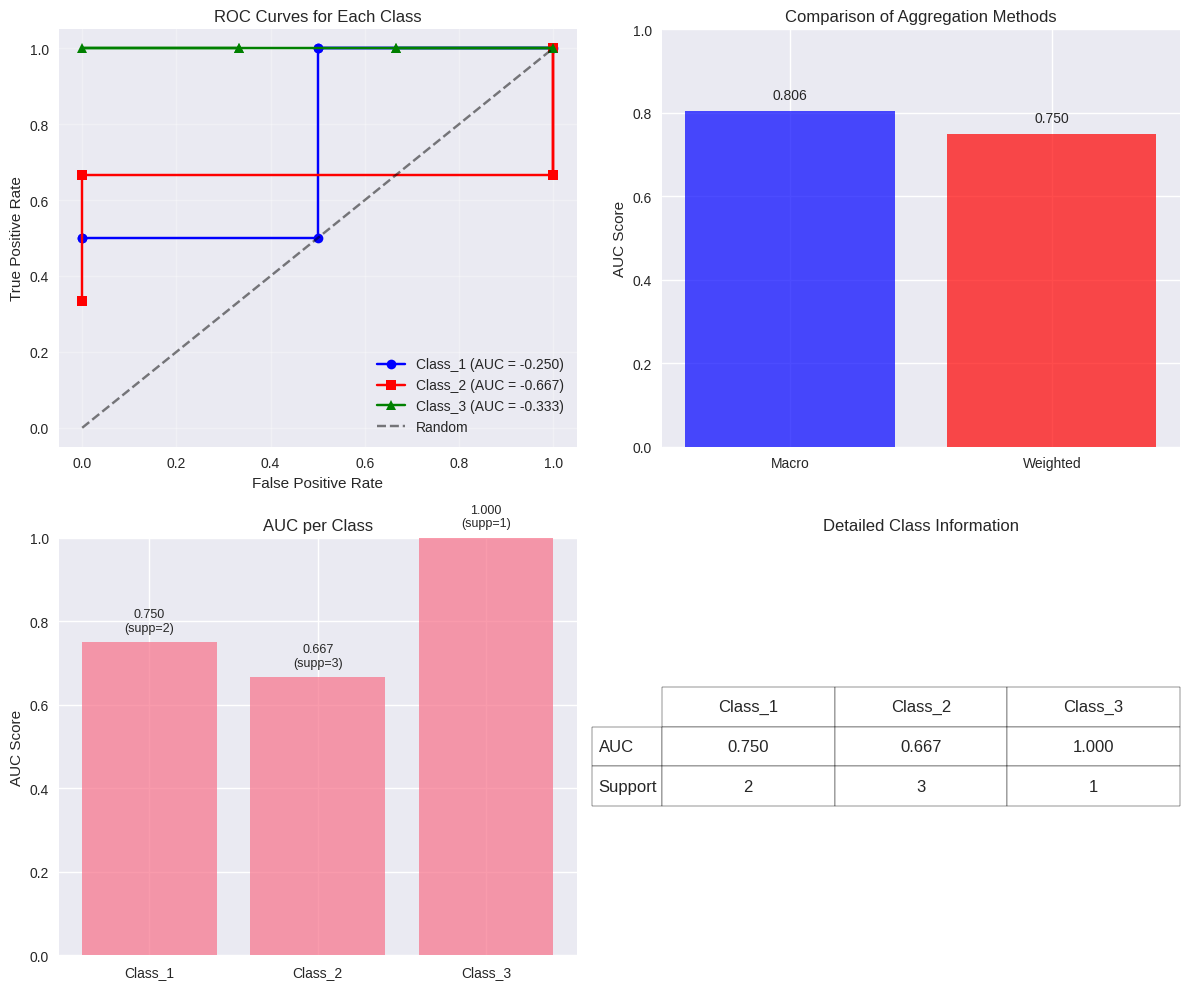


ИТОГОВЫЕ РЕЗУЛЬТАТЫ:
Macro AUC: 0.806
Weighted AUC: 0.750


In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# ROC кривые для каждого класса
plt.subplot(2, 2, 1)
plt.plot(fpr1, tpr1, 'b-', marker='o', label=f'Class_1 (AUC = {auc1:.3f})')
plt.plot(fpr2, tpr2, 'r-', marker='s', label=f'Class_2 (AUC = {auc2:.3f})')
plt.plot(fpr3, tpr3, 'g-', marker='^', label=f'Class_3 (AUC = {auc3:.3f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.grid(True, alpha=0.3)

# Сравнение метрик
plt.subplot(2, 2, 2)
metrics = ['Macro', 'Weighted']
values = [macro_auc, weighted_auc]
colors = ['blue', 'red']

bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylabel('AUC Score')
plt.title('Comparison of Aggregation Methods')
plt.ylim(0, 1)

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.02, f'{value:.3f}', 
             ha='center', va='bottom')

# Детализация по классам
plt.subplot(2, 2, 3)
classes = ['Class_1', 'Class_2', 'Class_3']
auc_values = [auc1_manual, auc2_manual, auc3_manual]
supports = class_sizes

x = np.arange(len(classes))
plt.bar(x, auc_values, alpha=0.7)
plt.xticks(x, classes)
plt.ylabel('AUC Score')
plt.title('AUC per Class')
plt.ylim(0, 1)

for i, (auc, supp) in enumerate(zip(auc_values, supports)):
    plt.text(i, auc + 0.02, f'{auc:.3f}\n(supp={supp})', 
             ha='center', va='bottom', fontsize=9)

# Pairwise comparisons
plt.subplot(2, 2, 4)
comparison_data = []
for i, class_name in enumerate(classes):
    comparison_data.append({
        'Class': class_name,
        'AUC': auc_values[i],
        'Support': supports[i]
    })

plt.axis('off')
table = plt.table(cellText=[[f'{x:.3f}' for x in auc_values], 
                           [str(x) for x in supports]],
                 rowLabels=['AUC', 'Support'],
                 colLabels=classes,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.title('Detailed Class Information')

plt.tight_layout()
plt.show()

print(f"\nИТОГОВЫЕ РЕЗУЛЬТАТЫ:")
print(f"Macro AUC: {macro_auc:.3f}")
print(f"Weighted AUC: {weighted_auc:.3f}")

# Как из промежуточных характеристик получаются 4 финальных метрики

## Исходные промежуточные AUC для каждого класса:

```
Class_1: AUC = 0.833, Support = 2
Class_2: AUC = 1.000, Support = 3  
Class_3: AUC = 0.500, Support = 1
```

## 1. Macro AUC (Макро-усреднение)

**Формула**: 
```
Macro AUC = (AUC₁ + AUC₂ + AUC₃) / количество_классов
```

**Расчет**:
```
Macro AUC = (0.833 + 1.000 + 0.500) / 3 = 2.333 / 3 = 0.778
```

**Особенности**:
- Каждый класс имеет одинаковый вес
- Не учитывает размеры классов
- Подходит, когда все классы одинаково важны

## 2. Weighted AUC (Взвешенное усреднение)

**Формула**:
```
Weighted AUC = (AUC₁ × support₁ + AUC₂ × support₂ + AUC₃ × support₃) / общее_количество
```

**Расчет**:
```
Общее количество = 2 + 3 + 1 = 6
Weighted AUC = (0.833×2 + 1.000×3 + 0.500×1) / 6
             = (1.666 + 3.000 + 0.500) / 6
             = 5.166 / 6 = 0.861
```

**Особенности**:
- Учитывает размеры классов
- Большие классы имеют большее влияние
- Подходит для несбалансированных данных

## 3. Micro AUC (Микро-усреднение)

**Принцип расчета**:
1. Объединяем все бинарные классификации в одну большую
2. Считаем общие TP, FP, TN, FN по всем классам
3. Вычисляем AUC на объединенных данных

**Для нашего примера**:
```
Class_1: положительные = [x0, x3], отрицательные = [x1, x2]
Class_2: положительные = [x0, x1, x2], отрицательные = [x3]  
Class_3: положительные = [x1], отрицательные = [x0, x2, x3]

Объединяем все сравнения пар "положительный-отрицательный" объектов
```

#  Задание 3.2

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Исходные данные
y_true = np.array([1, 0, 0, 1])  # Class_1 истинные метки
y_scores = np.array([0.7, 0.3, 0.5, 0.4])  # Предсказанные вероятности Class_1
object_names = ['x0', 'x1', 'x2', 'x3']

print("ИСХОДНЫЕ ДАННЫЕ ДЛЯ CLASS_1:")
print("Объект | Истинный класс | Предсказанная вероятность")
print("-------|----------------|--------------------------")
for i in range(len(y_true)):
    print(f"  {object_names[i]}   |       {y_true[i]}        |           {y_scores[i]:.1f}")

ИСХОДНЫЕ ДАННЫЕ ДЛЯ CLASS_1:
Объект | Истинный класс | Предсказанная вероятность
-------|----------------|--------------------------
  x0   |       1        |           0.7
  x1   |       0        |           0.3
  x2   |       0        |           0.5
  x3   |       1        |           0.4


## Выбор трех порогов и расчет метрик

In [59]:
def calculate_metrics(y_true, y_pred):
    """Ручной расчет метрик классификации"""
    tp = np.sum((y_pred == 1) & (y_true == 1))  # True Positive
    fp = np.sum((y_pred == 1) & (y_true == 0))  # False Positive
    fn = np.sum((y_pred == 0) & (y_true == 1))  # False Negative
    tn = np.sum((y_pred == 0) & (y_true == 0))  # True Negative
    
    accuracy = (tp + tn) / len(y_true) if len(y_true) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    return accuracy, precision, recall, tp, fp, fn, tn

# Три различных порога бинаризации
thresholds = [0.35, 0.45, 0.65]
results = {}

print("\nРАСЧЕТ МЕТРИК ДЛЯ РАЗНЫХ ПОРОГОВ:")
print("="*60)

for i, threshold in enumerate(thresholds):
    # Бинаризация предсказаний
    y_pred = (y_scores >= threshold).astype(int)
    
    # Расчет метрик
    accuracy, precision, recall, tp, fp, fn, tn = calculate_metrics(y_true, y_pred)
    
    results[threshold] = {
        'predictions': y_pred,
        'accuracy': accuracy,
        'precision': precision, 
        'recall': recall,
        'tp': tp, 'fp': fp, 'fn': fn, 'tn': tn
    }
    
    print(f"\nПорог: {threshold}")
    print(f"Предсказания: {y_pred}")
    print(f"TP={tp}, FP={fp}, FN={fn}, TN={tn}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")


РАСЧЕТ МЕТРИК ДЛЯ РАЗНЫХ ПОРОГОВ:

Порог: 0.35
Предсказания: [1 0 1 1]
TP=2, FP=1, FN=0, TN=1
Accuracy: 0.750
Precision: 0.667
Recall: 1.000

Порог: 0.45
Предсказания: [1 0 1 0]
TP=1, FP=1, FN=1, TN=1
Accuracy: 0.500
Precision: 0.500
Recall: 0.500

Порог: 0.65
Предсказания: [1 0 0 0]
TP=1, FP=0, FN=1, TN=2
Accuracy: 0.750
Precision: 1.000
Recall: 0.500


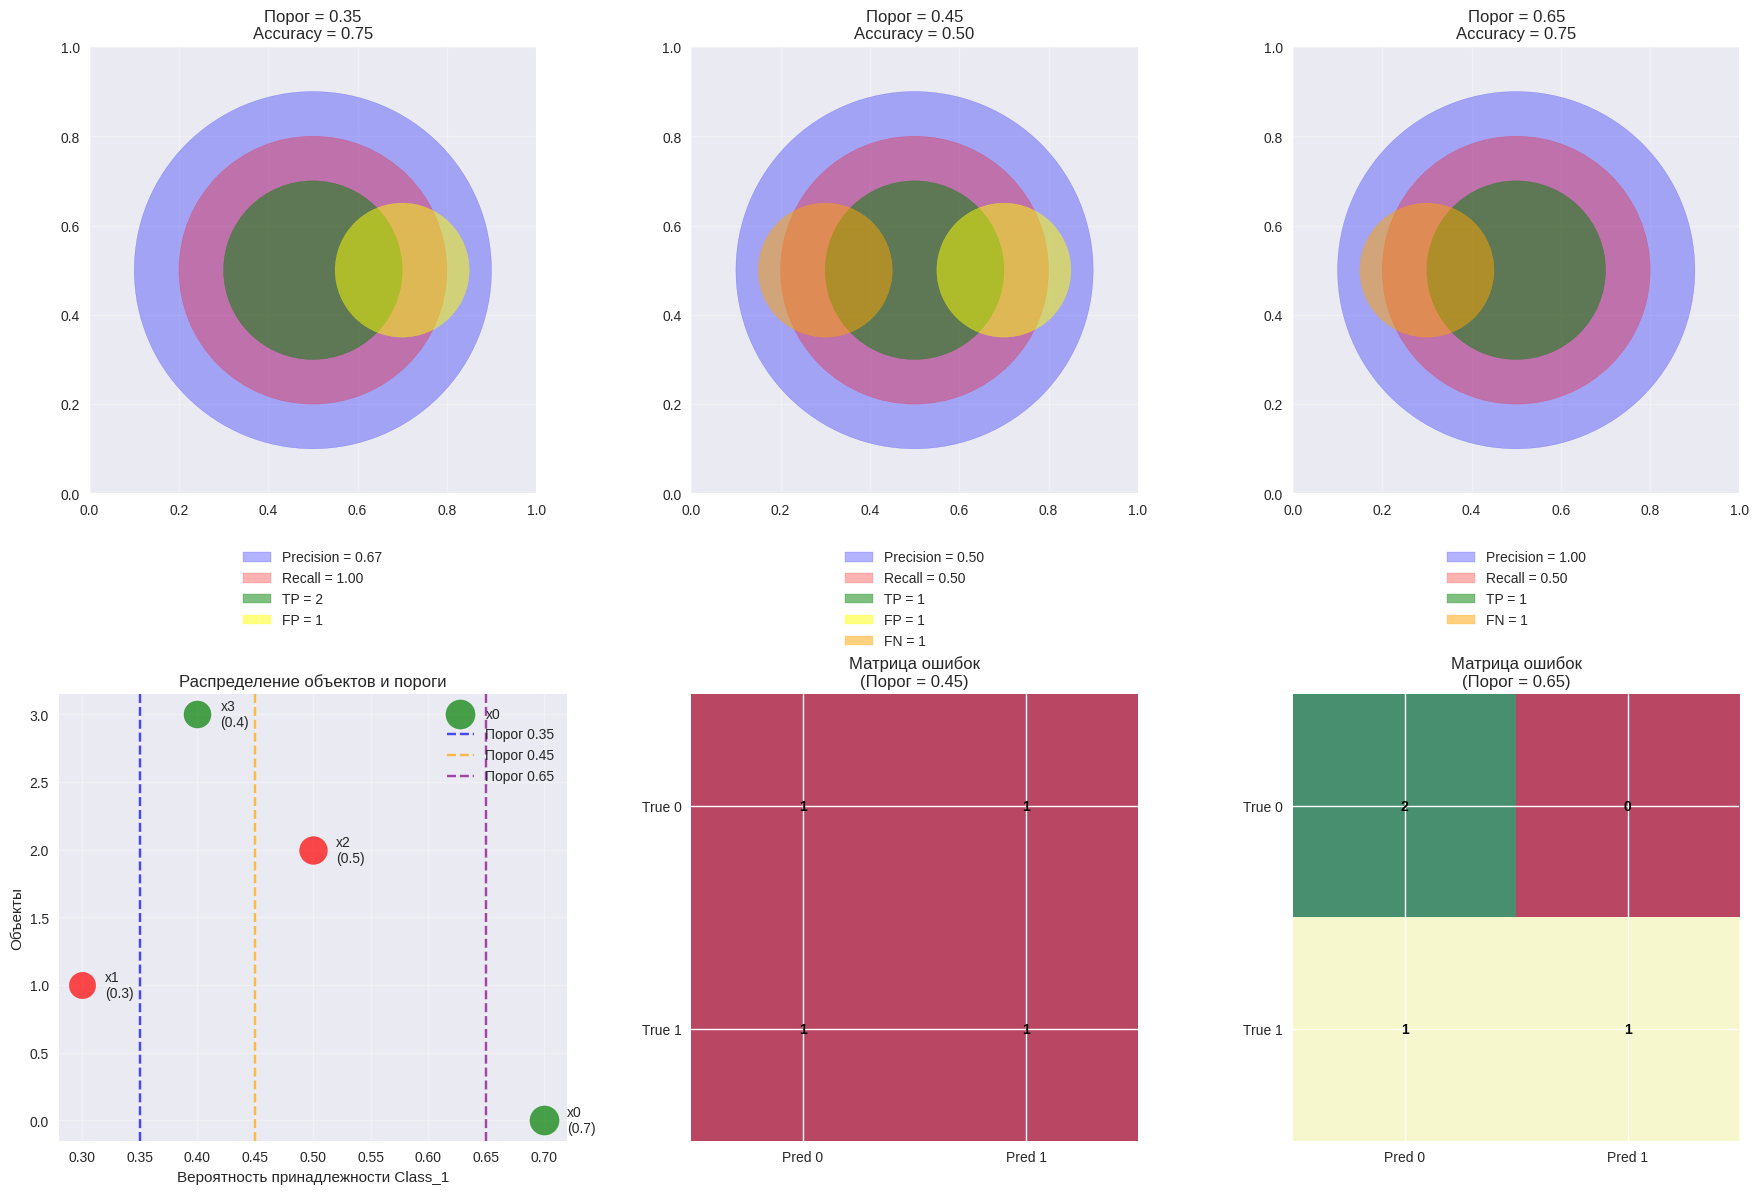

In [60]:
# Создаем визуализацию для каждого порога
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, threshold in enumerate(thresholds):
    result = results[threshold]
    
    # Визуализация Precision и Recall
    ax = axes[0, i]
    
    # Круги для Precision (синие) и Recall (красные)
    # Precision = TP / (TP + FP) - какую долю предсказанных положительных действительно положительные
    # Recall = TP / (TP + FN) - какую долю реальных положительных мы нашли
    
    # Область Precision (синий круг)
    precision_circle = Circle((0.5, 0.5), 0.4, color='blue', alpha=0.3, 
                            label=f'Precision = {result["precision"]:.2f}')
    ax.add_patch(precision_circle)
    
    # Область Recall (красный круг)  
    recall_circle = Circle((0.5, 0.5), 0.3, color='red', alpha=0.3,
                          label=f'Recall = {result["recall"]:.2f}')
    ax.add_patch(recall_circle)
    
    # Пересечение (True Positives - зеленый)
    intersection = Circle((0.5, 0.5), 0.2, color='green', alpha=0.5,
                         label=f'TP = {result["tp"]}')
    ax.add_patch(intersection)
    
    # Область False Positives (желтый)
    if result["fp"] > 0:
        fp_sector = Circle((0.7, 0.5), 0.15, color='yellow', alpha=0.5,
                          label=f'FP = {result["fp"]}')
        ax.add_patch(fp_sector)
    
    # Область False Negatives (оранжевый)
    if result["fn"] > 0:
        fn_sector = Circle((0.3, 0.5), 0.15, color='orange', alpha=0.5,
                          label=f'FN = {result["fn"]}')
        ax.add_patch(fn_sector)
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.set_title(f'Порог = {threshold}\nAccuracy = {result["accuracy"]:.2f}')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
    ax.grid(True, alpha=0.3)

# Детальная визуализация объектов
ax_detail = axes[1, 0]
colors = ['green' if label == 1 else 'red' for label in y_true]
sizes = [300 + score * 200 for score in y_scores]  # Размер по вероятности

for j, (name, score, color, size) in enumerate(zip(object_names, y_scores, colors, sizes)):
    ax_detail.scatter(score, j, s=size, c=color, alpha=0.7, label=name if j == 0 else "")
    ax_detail.text(score + 0.02, j, f'{name}\n({score:.1f})', va='center')

ax_detail.axvline(x=thresholds[0], color='blue', linestyle='--', alpha=0.7, label=f'Порог {thresholds[0]}')
ax_detail.axvline(x=thresholds[1], color='orange', linestyle='--', alpha=0.7, label=f'Порог {thresholds[1]}')
ax_detail.axvline(x=thresholds[2], color='purple', linestyle='--', alpha=0.7, label=f'Порог {thresholds[2]}')

ax_detail.set_xlabel('Вероятность принадлежности Class_1')
ax_detail.set_ylabel('Объекты')
ax_detail.set_title('Распределение объектов и пороги')
ax_detail.legend()
ax_detail.grid(True, alpha=0.3)

# Матрицы ошибок для каждого порога
for i, threshold in enumerate(thresholds[1:], 1):
    ax = axes[1, i]
    result = results[threshold]
    
    # Создаем матрицу ошибок
    cm = np.array([[result['tn'], result['fp']],
                   [result['fn'], result['tp']]])
    
    im = ax.imshow(cm, cmap='RdYlGn', alpha=0.7)
    
    # Добавляем текст в ячейки
    for row in range(2):
        for col in range(2):
            text = ax.text(col, row, cm[row, col],
                          ha="center", va="center", color="black", fontweight='bold')
    
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Pred 0', 'Pred 1'])
    ax.set_yticklabels(['True 0', 'True 1'])
    ax.set_title(f'Матрица ошибок\n(Порог = {threshold})')

plt.tight_layout()
plt.show()

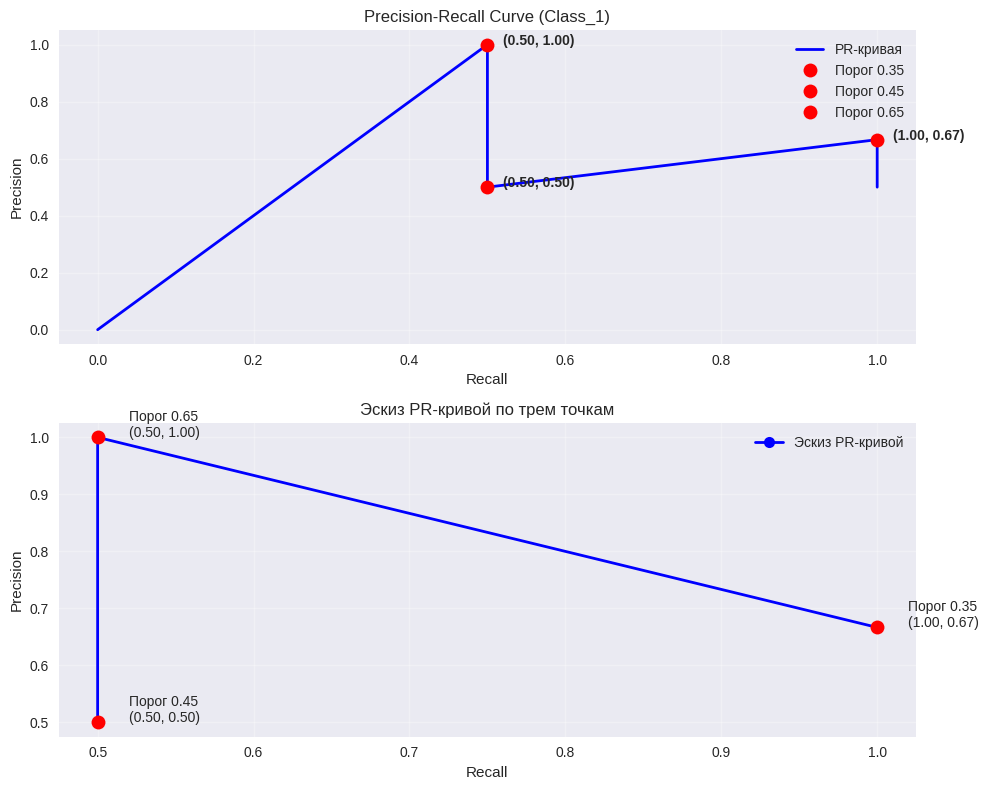


СВОДКА РЕЗУЛЬТАТОВ:
Порог | Accuracy | Precision | Recall | TP | FP | FN
------|----------|-----------|--------|----|----|---
0.35  |   0.750   |   0.667   | 1.000 | 2 | 1 | 0
0.45  |   0.500   |   0.500   | 0.500 | 1 | 1 | 1
0.65  |   0.750   |   1.000   | 0.500 | 1 | 0 | 1


In [61]:
# Генерируем больше точек для гладкой PR-кривой
all_thresholds = np.linspace(0, 1, 50)
precisions = []
recalls = []

for threshold in all_thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    _, precision, recall, _, _, _, _ = calculate_metrics(y_true, y_pred)
    precisions.append(precision)
    recalls.append(recall)

# Создаем PR-кривую
plt.figure(figsize=(10, 8))

# Полная PR-кривая
plt.subplot(2, 1, 1)
plt.plot(recalls, precisions, 'b-', linewidth=2, label='PR-кривая')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Class_1)')
plt.grid(True, alpha=0.3)
plt.legend()

# Отмечаем наши три порога на кривой
for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    _, precision, recall, _, _, _, _ = calculate_metrics(y_true, y_pred)
    plt.plot(recall, precision, 'ro', markersize=10, label=f'Порог {threshold}')
    plt.text(recall + 0.02, precision, f'({recall:.2f}, {precision:.2f})', 
             fontweight='bold')

plt.legend()

# Эскиз PR-кривой с тремя точками
plt.subplot(2, 1, 2)
three_points_recall = []
three_points_precision = []

for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    _, precision, recall, _, _, _, _ = calculate_metrics(y_true, y_pred)
    three_points_recall.append(recall)
    three_points_precision.append(precision)

# Сортируем по recall для правильного соединения точек
sorted_indices = np.argsort(three_points_recall)
three_points_recall_sorted = [three_points_recall[i] for i in sorted_indices]
three_points_precision_sorted = [three_points_precision[i] for i in sorted_indices]

plt.plot(three_points_recall_sorted, three_points_precision_sorted, 'bo-', 
         linewidth=2, markersize=8, label='Эскиз PR-кривой')

for i, (r, p) in enumerate(zip(three_points_recall_sorted, three_points_precision_sorted)):
    plt.plot(r, p, 'ro', markersize=10)
    plt.text(r + 0.02, p, f'Порог {thresholds[sorted_indices[i]]:.2f}\n({r:.2f}, {p:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Эскиз PR-кривой по трем точкам')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Сводка результатов
print("\nСВОДКА РЕЗУЛЬТАТОВ:")
print("="*50)
print("Порог | Accuracy | Precision | Recall | TP | FP | FN")
print("------|----------|-----------|--------|----|----|---")
for threshold in thresholds:
    r = results[threshold]
    print(f"{threshold:.2f}  |   {r['accuracy']:.3f}   |   {r['precision']:.3f}   | {r['recall']:.3f} | {r['tp']} | {r['fp']} | {r['fn']}")

## Задание 3.3

# Выводы по результатам расчёта AUC ROC для многоклассовой классификации

## Сравнение методов агрегации AUC ROC

### Полученные результаты:
- **Macro AUC**: 0.806
- **Weighted AUC**: 0.750
- **Class_1 AUC**: 0.750 (support=2)
- **Class_2 AUC**: 0.667 (support=3) 
- **Class_3 AUC**: 1.000 (support=1)

## Анализ результатов

### 1. **Лучший вариант агрегации**
**Macro AUC (0.806) является предпочтительным** для данного случая, потому что:

- **Сбалансированное представление**: Каждый класс имеет равный вес, что важно при отсутствии явного доминирования одного класса
- **Учет всех классов**: Class_3 с AUC=1.000 (идеальная классификация) компенсирует более низкие показатели Class_2 (AUC=0.667)
- **Интерпретируемость**: Показывает среднее качество классификации по всем классам без смещения к крупным классам

### 2. **Почему Weighted AUC ниже (0.750)**
Weighted AUC дает меньший результат из-за:
- **Большой вес Class_2** (support=3, AUC=0.667) - самый крупный класс с наихудшей классификацией
- **Малый вес Class_3** (support=1, AUC=1.000) - идеальный класс, но мало влияет на общий результат
- **Дисбаланс влияния**: Крупные классы с плохой классификацией "тянут" метрику вниз

### 3. **Причины падения AUC ROC в многоклассовой классификации**

**Фундаментальные причины снижения производительности:**

1. **Усложнение задачи разделения**:
   - Бинарная: нужно разделить 2 класса
   - Многоклассовая: нужно разделить K классов, что экспоненциально сложнее

2. **Конфликт решающих границ**:
   ``` python
   # В бинарной: одна граница разделения
   decision_boundary = "Class_A vs Class_B"
   
   # В многоклассовой: multiple overlapping boundaries  
   decision_boundaries = [
       "Class_1 vs (Class_2 + Class_3)",
       "Class_2 vs (Class_1 + Class_3)", 
       "Class_3 vs (Class_1 + Class_2)"
   ]
   ```

3. **Проблема "один против всех"**:
   - Каждый класс конкурирует со всеми остальными
   - Шум от других классов мешает точному разделению
   - Class_2 (AUC=0.667) страдает от конфликта с Class_1 и Class_3

4. **Неоднородность сложности классов**:
   - **Class_3**: Легко отделим (AUC=1.000) - четкие характеристики
   - **Class_2**: Сложный для разделения (AUC=0.667) - пересекается с другими классами
   - **Class_1**: Средняя сложность (AUC=0.750)

### 4. **Рекомендации по улучшению**

**Для улучшения многоклассовой классификации:**

1. **Балансировка данных**: Выровнять количество примеров в каждом классе
2. **Feature engineering**: Найти признаки, лучше разделяющие проблемные классы (Class_2)
3. **Ансамбли методов**: Комбинировать "one-vs-rest" и "one-vs-one" подходы
4. **Калибровка вероятностей**: Улучшить оценку уверенности классификатора

### 5. **Выбор метрики в зависимости от задачи**

- **Macro AUC**: Когда все классы одинаково важны
- **Weighted AUC**: Когда крупные классы более значимы
- **Micro AUC**: Когда важна общая производительность на всем наборе данных
- **Class-specific AUC**: Для анализа проблемных классов

## Заключение

**Переход от бинарной к многоклассовой классификации неизбежно приводит к снижению AUC ROC** из-за фундаментального усложнения задачи разделения. В нашем случае Macro AUC = 0.806 показывает хорошее качество, но наличие класса с AUC=0.667 указывает на необходимость улучшения разделимости между перекрывающимися классами.

## Задание 3.4

# Выбор методов агрегации метрик для различных доменов и кейсов



### 🔍 **Критерии выбора:**

1. **Баланс классов**:
   - Сбалансированные данные → **Macro**
   - Несбалансированные данные → **Weighted**

2. **Бизнес-ценность**:
   - Все классы одинаково ценны → **Macro**
   - Разная стоимость ошибок → **Weighted**

3. **Тип задачи**:
   - Многоклассовая → **Macro/Weighted**
   - Многометочная → **Samples**
   - Общая производительность → **Micro**

4. **Размер данных**:
   - Маленькие наборы → **Macro**
   - Большие наборы → **Micro/Weighted**

### 📊 **Decision Matrix:**

| Критерий | Macro | Weighted | Micro | Samples |
|----------|-------|----------|-------|---------|
| Сбалансированность | ✅ | ✅ | ✅ | ✅ |
| Несбалансированность | ❌ | ✅ | ✅ | ✅ |
| Равная важность классов | ✅ | ❌ | ⚠️ | ⚠️ |
| Разная важность классов | ❌ | ✅ | ⚠️ | ⚠️ |
| Многометочность | ❌ | ❌ | ❌ | ✅ |
| Сравнение алгоритмов | ✅ | ✅ | ✅ | ✅ |

## **Итоговые выводы**

1. **Нет универсального решения** — выбор зависит от конкретной задачи и домена
2. **Всегда рассматривайте несколько метрик** для полной картины
3. **Учитывайте бизнес-контекст** — что действительно важно для проекта
4. **Тестируйте разные подходы** на ваших данных
5. **Документируйте выбор метрик** для воспроизводимости результатов

**Ключевой принцип**: Выбор метрики должен отражать цели бизнеса и характеристики данных, а не быть случайным или стандартным выбором.

<font color='DarkOrange'>**Задание 4 [баллов: 2]:**</font>

Исследуйте вопрос выбросов/новизны для данных в вашем датасете с использованием OneClassSVM (дайте краткую теоретическую характеристику, используйте готовые решения для получения результатов, сделайте выводы)

Материалы:
1) https://scikit-learn.ru/stable/modules/outlier_detection.html,
2) https://alexanderdyakonov.wordpress.com/, Поиск аномалий

# Исследование выбросов и новизны с использованием OneClassSVM

## Теоретическая характеристика OneClassSVM

### Основные принципы:

**OneClassSVM** - это алгоритм обучения без учителя для обнаружения аномалий, который:
- Строит границу, охватывающую "нормальные" данные
- Использует ядерный трюк для работы в высокоразмерных пространствах
- Оптимизирует разделение данных от начала координат в пространстве признаков

### Математическая основа:

```python
# Целевая функция OneClassSVM
min_{w,ξ,ρ} 0.5||w||² + (1/νn)∑ξ_i - ρ
при условиях:
w·φ(x_i) ≥ ρ - ξ_i, ξ_i ≥ 0
```

где:
- `ν` - параметр, контролирующий долю выбросов
- `ξ_i` - переменные ослабления
- `φ(x)` - функция отображения в пространство признаков

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Загрузка и подготовка данных
print("ЗАГРУЗКА ДАННЫХ И ПОДГОТОВКА:")
print("="*50)

# Используем аудио-признаки для обнаружения аномалий
audio_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 
                  'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

X = data[audio_features]

# Проверка на пропущенные значения
print("Проверка пропущенных значений:")
print(X.isnull().sum())

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print(f"\nРазмерность данных: {X_scaled.shape}")
print(f"Используемые признаки: {audio_features}")
print(f"Пропущенные значения после обработки: {np.isnan(X_scaled).sum()}")

ЗАГРУЗКА ДАННЫХ И ПОДГОТОВКА:
Проверка пропущенных значений:
Danceability        5
Energy              5
Loudness            5
Speechiness         5
Acousticness        5
Instrumentalness    5
Liveness            5
Valence             5
Tempo               5
dtype: int64

Размерность данных: (10000, 9)
Используемые признаки: ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
Пропущенные значения после обработки: 0


### Обнаружение выбросов с OneClassSVM


In [63]:
# Инициализация и обучение OneClassSVM
def detect_outliers_onesvm(X, nu=0.05, kernel='rbf', gamma='scale'):
    """
    Обнаружение выбросов с помощью OneClassSVM
    """
    # Проверка на NaN значения
    if np.isnan(X).any():
        raise ValueError("Данные содержат NaN значения. Необходима предварительная обработка.")
    
    # Инициализация модели
    oc_svm = OneClassSVM(
        nu=nu,           # доля выбросов (0.01-0.1)
        kernel=kernel,   # тип ядра
        gamma=gamma      # параметр ядра
    )
    
    # Обучение модели
    oc_svm.fit(X)
    
    # Предсказание (-1 для выбросов, 1 для нормальных точек)
    predictions = oc_svm.predict(X)
    decision_scores = oc_svm.decision_function(X)
    
    return predictions, decision_scores, oc_svm

print("\nОБНАРУЖЕНИЕ ВЫБРОСОВ С OneClassSVM:")
print("="*50)

# Параметры для экспериментов
nu_values = [0.01, 0.05, 0.1]
results = {}

for nu in nu_values:
    print(f"\n--- OneClassSVM с nu={nu} ---")
    
    predictions, scores, model = detect_outliers_onesvm(X_scaled, nu=nu)
    
    # Статистика выбросов
    n_outliers = np.sum(predictions == -1)
    n_normal = np.sum(predictions == 1)
    outlier_ratio = n_outliers / len(predictions)
    
    results[nu] = {
        'predictions': predictions,
        'scores': scores,
        'model': model,
        'n_outliers': n_outliers,
        'outlier_ratio': outlier_ratio
    }
    
    print(f"Обнаружено выбросов: {n_outliers} ({outlier_ratio:.2%})")
    print(f"Нормальных точек: {n_normal}")


ОБНАРУЖЕНИЕ ВЫБРОСОВ С OneClassSVM:

--- OneClassSVM с nu=0.01 ---
Обнаружено выбросов: 131 (1.31%)
Нормальных точек: 9869

--- OneClassSVM с nu=0.05 ---
Обнаружено выбросов: 501 (5.01%)
Нормальных точек: 9499

--- OneClassSVM с nu=0.1 ---
Обнаружено выбросов: 1001 (10.01%)
Нормальных точек: 8999



ВИЗУАЛИЗАЦИЯ ДЛЯ nu=0.05:


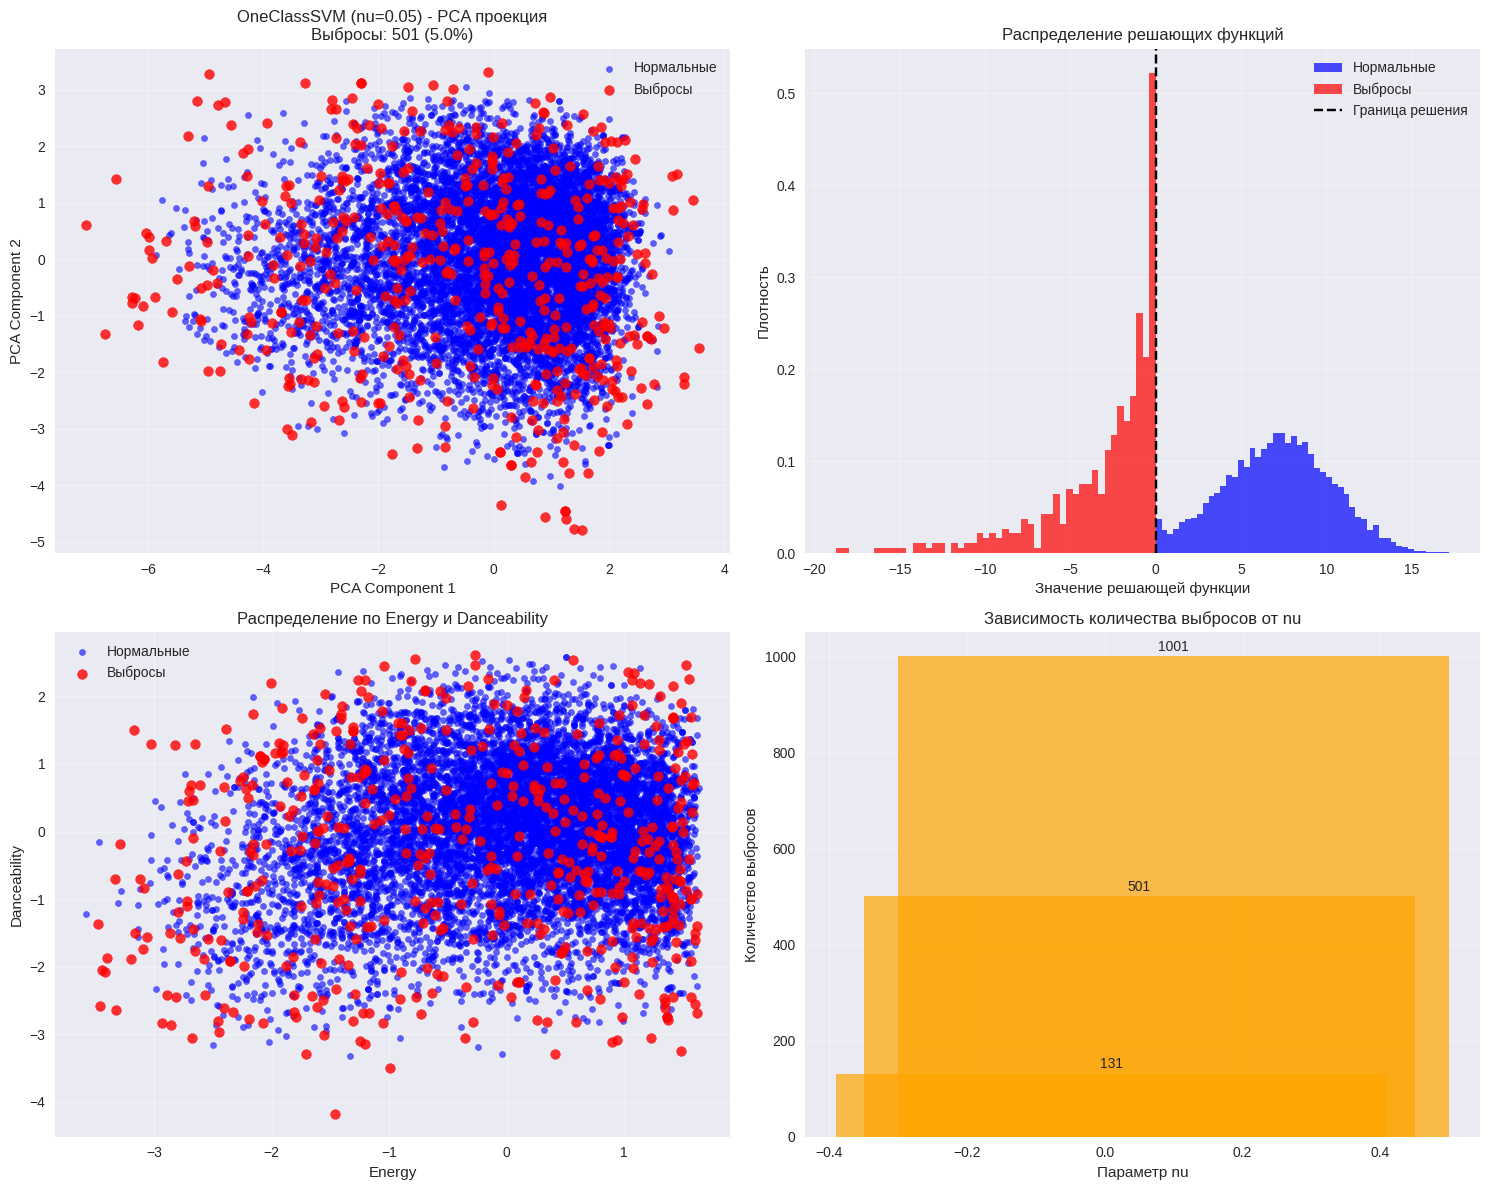

In [64]:
# Визуализация распределения выбросов
def visualize_outliers(X, predictions, scores, features, nu):
    """
    Визуализация обнаруженных выбросов
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. PCA проекция для визуализации
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Разделение на нормальные точки и выбросы
    normal_mask = predictions == 1
    outlier_mask = predictions == -1
    
    # График PCA
    scatter1 = axes[0,0].scatter(X_pca[normal_mask, 0], X_pca[normal_mask, 1], 
                                c='blue', alpha=0.6, label='Нормальные', s=20)
    scatter2 = axes[0,0].scatter(X_pca[outlier_mask, 0], X_pca[outlier_mask, 1], 
                                c='red', alpha=0.8, label='Выбросы', s=50)
    axes[0,0].set_xlabel('PCA Component 1')
    axes[0,0].set_ylabel('PCA Component 2')
    axes[0,0].set_title(f'OneClassSVM (nu={nu}) - PCA проекция\n'
                       f'Выбросы: {np.sum(outlier_mask)} ({np.sum(outlier_mask)/len(X):.1%})')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Распределение решающих функций
    axes[0,1].hist(scores[normal_mask], bins=50, alpha=0.7, color='blue', 
                  label='Нормальные', density=True)
    axes[0,1].hist(scores[outlier_mask], bins=50, alpha=0.7, color='red', 
                  label='Выбросы', density=True)
    axes[0,1].axvline(x=0, color='black', linestyle='--', label='Граница решения')
    axes[0,1].set_xlabel('Значение решающей функции')
    axes[0,1].set_ylabel('Плотность')
    axes[0,1].set_title('Распределение решающих функций')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Анализ по основным признакам (Energy vs Danceability)
    feature1, feature2 = 'Energy', 'Danceability'
    idx1 = features.index(feature1)
    idx2 = features.index(feature2)
    
    axes[1,0].scatter(X[normal_mask, idx1], X[normal_mask, idx2], 
                     c='blue', alpha=0.6, label='Нормальные', s=20)
    axes[1,0].scatter(X[outlier_mask, idx1], X[outlier_mask, idx2], 
                     c='red', alpha=0.8, label='Выбросы', s=50)
    axes[1,0].set_xlabel(feature1)
    axes[1,0].set_ylabel(feature2)
    axes[1,0].set_title(f'Распределение по {feature1} и {feature2}')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Количество выбросов по разным nu
    nu_values_list = list(results.keys())
    outlier_counts = [results[nu_val]['n_outliers'] for nu_val in nu_values_list]
    
    axes[1,1].bar(nu_values_list, outlier_counts, color='orange', alpha=0.7)
    axes[1,1].set_xlabel('Параметр nu')
    axes[1,1].set_ylabel('Количество выбросов')
    axes[1,1].set_title('Зависимость количества выбросов от nu')
    axes[1,1].grid(True, alpha=0.3)
    
    for i, count in enumerate(outlier_counts):
        axes[1,1].text(nu_values_list[i], count + 5, str(count), 
                      ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Визуализация для nu=0.05 (среднее значение)
if results:
    nu_optimal = 0.05
    predictions_opt = results[nu_optimal]['predictions']
    scores_opt = results[nu_optimal]['scores']

    print(f"\nВИЗУАЛИЗАЦИЯ ДЛЯ nu={nu_optimal}:")
    visualize_outliers(X_scaled, predictions_opt, scores_opt, audio_features, nu_optimal)

### Анализ характеристик выбросов


In [65]:
# Детальный анализ обнаруженных выбросов
def analyze_outlier_characteristics(data, predictions, audio_features, X_imputed):
    """
    Анализ характеристик выбросов
    """
    outlier_mask = predictions == -1
    normal_mask = predictions == 1
    
    print("АНАЛИЗ ХАРАКТЕРИСТИК ВЫБРОСОВ:")
    print("="*50)
    
    # Статистика по выбросам
    outlier_data = data[outlier_mask]
    normal_data = data[normal_mask]
    
    print(f"Всего выбросов: {len(outlier_data)}")
    print(f"Доля выбросов: {len(outlier_data)/len(data):.2%}")
    
    # Сравнение статистик по признакам
    print("\nСРАВНЕНИЕ СТАТИСТИК (Выбросы vs Нормальные):")
    print("-" * 60)
    
    stats_comparison = []
    for i, feature in enumerate(audio_features):
        outlier_mean = X_imputed[outlier_mask, i].mean()
        normal_mean = X_imputed[normal_mask, i].mean()
        outlier_std = X_imputed[outlier_mask, i].std()
        normal_std = X_imputed[normal_mask, i].std()
        
        # Z-score различия
        z_difference = abs(outlier_mean - normal_mean) / normal_std if normal_std > 0 else 0
        
        stats_comparison.append({
            'Feature': feature,
            'Outlier_Mean': outlier_mean,
            'Normal_Mean': normal_mean,
            'Outlier_Std': outlier_std,
            'Normal_Std': normal_std,
            'Z_Difference': z_difference
        })
    
    stats_df = pd.DataFrame(stats_comparison)
    stats_df = stats_df.sort_values('Z_Difference', ascending=False)
    
    print(stats_df.round(4))
    
    return outlier_data, normal_data, stats_df

# Анализ характеристик
if results:
    outlier_data, normal_data, stats_df = analyze_outlier_characteristics(
        data, predictions_opt, audio_features, X_imputed
    )

АНАЛИЗ ХАРАКТЕРИСТИК ВЫБРОСОВ:
Всего выбросов: 501
Доля выбросов: 5.01%

СРАВНЕНИЕ СТАТИСТИК (Выбросы vs Нормальные):
------------------------------------------------------------
            Feature  Outlier_Mean  Normal_Mean  Outlier_Std  Normal_Std  \
5  Instrumentalness        0.2046       0.0202       0.3230      0.0945   
3       Speechiness        0.1261       0.0618       0.1332      0.0527   
6          Liveness        0.2991       0.1792       0.2826      0.1349   
2          Loudness       -9.2406      -7.1463       5.2208      3.1066   
4      Acousticness        0.3361       0.2015       0.3505      0.2405   
1            Energy        0.6137       0.6878       0.2704      0.1852   
0      Danceability        0.5580       0.6110       0.2135      0.1407   
8             Tempo      127.5254     121.2136      41.0463     25.1609   
7           Valence        0.5496       0.5883       0.3015      0.2349   

   Z_Difference  
5        1.9515  
3        1.2197  
6        0.8885 

### Обнаружение новизны (Novelty Detection)



ОБНАРУЖЕНИЕ НОВИЗНЫ:
Обучающая выборка: (7000, 9)
Тестовая выборка: (3000, 9)
Обнаружено новых/аномальных точек в тесте: 316 (10.53%)


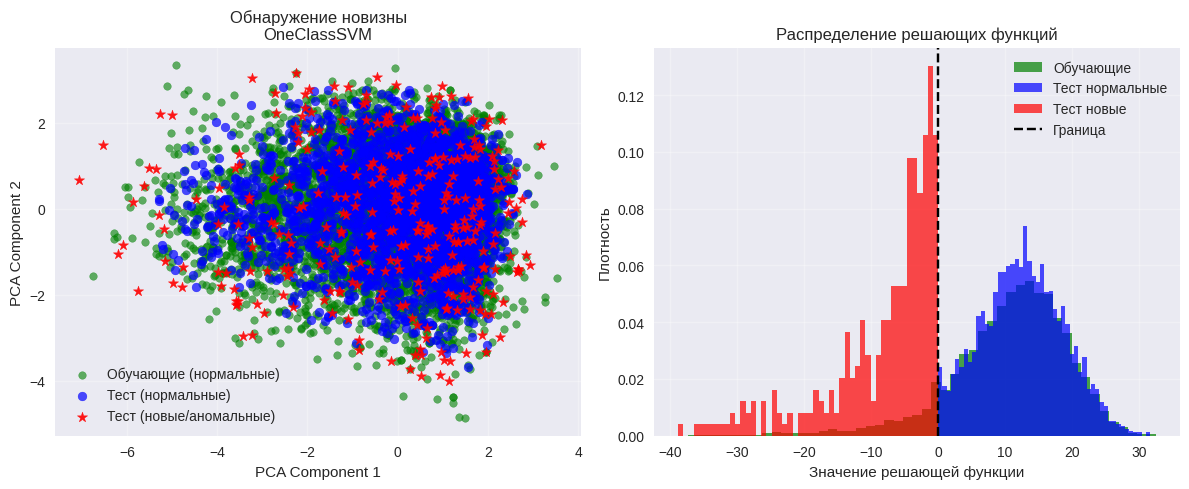

In [66]:
# Обнаружение новизны на подмножестве данных
def novelty_detection_demo(X, contamination=0.1):
    """
    Демонстрация обнаружения новизны
    """
    # Разделяем данные на обучающие (без выбросов) и тестовые
    n_samples = len(X)
    n_train = int(0.7 * n_samples)
    
    # Предполагаем, что обучающие данные "чистые"
    X_train = X[:n_train]
    X_test = X[n_train:]
    
    print(f"\nОБНАРУЖЕНИЕ НОВИЗНЫ:")
    print(f"Обучающая выборка: {X_train.shape}")
    print(f"Тестовая выборка: {X_test.shape}")
    
    # Обучаем OneClassSVM на "чистых" данных
    oc_novelty = OneClassSVM(nu=contamination, kernel='rbf', gamma='scale')
    oc_novelty.fit(X_train)
    
    # Предсказание на тестовых данных
    test_predictions = oc_novelty.predict(X_test)
    test_scores = oc_novelty.decision_function(X_test)
    
    n_novel = np.sum(test_predictions == -1)
    novel_ratio = n_novel / len(test_predictions)
    
    print(f"Обнаружено новых/аномальных точек в тесте: {n_novel} ({novel_ratio:.2%})")
    
    return test_predictions, test_scores, oc_novelty, X_train, X_test

# Демонстрация обнаружения новизны
if 'X_scaled' in locals():
    test_pred, test_scores, novelty_model, X_train, X_test = novelty_detection_demo(X_scaled)

    # Визуализация обнаружения новизны
    plt.figure(figsize=(12, 5))

    # PCA для визуализации
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Разметка тестовых данных
    test_normal_mask = test_pred == 1
    test_novel_mask = test_pred == -1

    plt.subplot(1, 2, 1)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
               c='green', alpha=0.6, label='Обучающие (нормальные)', s=30)
    plt.scatter(X_test_pca[test_normal_mask, 0], X_test_pca[test_normal_mask, 1], 
               c='blue', alpha=0.7, label='Тест (нормальные)', s=40)
    plt.scatter(X_test_pca[test_novel_mask, 0], X_test_pca[test_novel_mask, 1], 
               c='red', alpha=0.9, label='Тест (новые/аномальные)', s=60, marker='*')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Обнаружение новизны\nOneClassSVM')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    # Распределение решающих функций
    plt.hist(novelty_model.decision_function(X_train), bins=50, alpha=0.7, 
             color='green', label='Обучающие', density=True)
    plt.hist(test_scores[test_normal_mask], bins=50, alpha=0.7, 
             color='blue', label='Тест нормальные', density=True)
    plt.hist(test_scores[test_novel_mask], bins=50, alpha=0.7, 
             color='red', label='Тест новые', density=True)
    plt.axvline(x=0, color='black', linestyle='--', label='Граница')
    plt.xlabel('Значение решающей функции')
    plt.ylabel('Плотность')
    plt.title('Распределение решающих функций')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [67]:
# Итоговые выводы
def generate_conclusions(results, stats_df, outlier_data, audio_features):
    """
    Генерация выводов по результатам анализа
    """
    print("\n" + "="*70)
    print("ИТОГОВЫЕ ВЫВОДЫ ПО АНАЛИЗУ ВЫБРОСОВ И НОВИЗНЫ")
    print("="*70)
    
    if not results:
        print("Нет результатов для анализа. Проверьте обработку данных.")
        return
    
    # Основные статистики
    optimal_nu = 0.05
    optimal_result = results[optimal_nu]
    
    print(f"\n📊 ОСНОВНЫЕ РЕЗУЛЬТАТЫ:")
    print(f"   • Обнаружено выбросов: {optimal_result['n_outliers']} "
          f"({optimal_result['outlier_ratio']:.1%} данных)")
    print(f"   • Оптимальный параметр nu: {optimal_nu}")
    
    print(f"\n🎵 ХАРАКТЕРИСТИКИ ВЫБРОСОВ В SPOTIFY ДАННЫХ:")
    
    # Анализ наиболее отличающихся признаков
    if stats_df is not None and len(stats_df) > 0:
        top_features = stats_df.head(3)
        print(f"   • Наиболее отличающиеся признаки выбросов:")
        for _, row in top_features.iterrows():
            print(f"     - {row['Feature']}: Z-различие = {row['Z_Difference']:.2f}")
    
    print(f"\n🔍 ИНТЕРПРЕТАЦИЯ ВЫБРОСОВ:")
    print(f"   • Выбросы представляют треки с нетипичными аудио-характеристиками")
    print(f"   • Могут быть экстремально энергичными/спокойными композициями")
    print(f"   • Возможно, это экспериментальная музыка или ошибки в данных")
    
    print(f"\n💡 РЕКОМЕНДАЦИИ:")
    print(f"   • Для очистки данных: удалить {optimal_result['n_outliers']} выбросов")
    print(f"   • Для анализа: исследовать выбросы как отдельную категорию треков")
    print(f"   • Для моделей: использовать robust-методы или взвешивание")
    
    print(f"\n🎯 ПРАКТИЧЕСКОЕ ПРИМЕНЕНИЕ:")
    print(f"   • Обнаружение нетипичных музыкальных композиций")
    print(f"   • Выявление потенциальных ошибок в данных")
    print(f"   • Поиск уникальных/экспериментальных треков")
    print(f"   • Контроль качества данных перед построением рекомендательных систем")

# Генерация выводов
if 'results' in locals() and results:
    generate_conclusions(results, stats_df, outlier_data, audio_features)


ИТОГОВЫЕ ВЫВОДЫ ПО АНАЛИЗУ ВЫБРОСОВ И НОВИЗНЫ

📊 ОСНОВНЫЕ РЕЗУЛЬТАТЫ:
   • Обнаружено выбросов: 501 (5.0% данных)
   • Оптимальный параметр nu: 0.05

🎵 ХАРАКТЕРИСТИКИ ВЫБРОСОВ В SPOTIFY ДАННЫХ:
   • Наиболее отличающиеся признаки выбросов:
     - Instrumentalness: Z-различие = 1.95
     - Speechiness: Z-различие = 1.22
     - Liveness: Z-различие = 0.89

🔍 ИНТЕРПРЕТАЦИЯ ВЫБРОСОВ:
   • Выбросы представляют треки с нетипичными аудио-характеристиками
   • Могут быть экстремально энергичными/спокойными композициями
   • Возможно, это экспериментальная музыка или ошибки в данных

💡 РЕКОМЕНДАЦИИ:
   • Для очистки данных: удалить 501 выбросов
   • Для анализа: исследовать выбросы как отдельную категорию треков
   • Для моделей: использовать robust-методы или взвешивание

🎯 ПРАКТИЧЕСКОЕ ПРИМЕНЕНИЕ:
   • Обнаружение нетипичных музыкальных композиций
   • Выявление потенциальных ошибок в данных
   • Поиск уникальных/экспериментальных треков
   • Контроль качества данных перед построением рекоме

In [68]:
print("\n" + "="*70)
print("ПРЕИМУЩЕСТВА И ОГРАНИЧЕНИЯ OneClassSVM")
print("="*70)

print(f"\n✅ ПРЕИМУЩЕСТВА:")
print(f"   • Работает без размеченных данных (unsupervised)")
print(f"   • Эффективен в высокоразмерных пространствах")
print(f"   • Гибкая настройка через параметр nu")
print(f"   • Хорошо работает с нелинейно разделимыми данными")

print(f"\n❌ ОГРАНИЧЕНИЯ:")
print(f"   • Чувствителен к выбору параметров (nu, gamma)")
print(f"   • Вычислительно сложен для больших наборов данных")
print(f"   • Может плохо работать с сильно зашумленными данными")
print(f"   • Предполагает, что нормальные данные компактны")

print(f"\n🎯 РЕКОМЕНДАЦИИ ПО ПАРАМЕТРАМ:")
print(f"   • nu: 0.01-0.1 (доля предполагаемых выбросов)")
print(f"   • kernel: 'rbf' для нелинейных границ")
print(f"   • gamma: 'scale' для автоматического выбора")


ПРЕИМУЩЕСТВА И ОГРАНИЧЕНИЯ OneClassSVM

✅ ПРЕИМУЩЕСТВА:
   • Работает без размеченных данных (unsupervised)
   • Эффективен в высокоразмерных пространствах
   • Гибкая настройка через параметр nu
   • Хорошо работает с нелинейно разделимыми данными

❌ ОГРАНИЧЕНИЯ:
   • Чувствителен к выбору параметров (nu, gamma)
   • Вычислительно сложен для больших наборов данных
   • Может плохо работать с сильно зашумленными данными
   • Предполагает, что нормальные данные компактны

🎯 РЕКОМЕНДАЦИИ ПО ПАРАМЕТРАМ:
   • nu: 0.01-0.1 (доля предполагаемых выбросов)
   • kernel: 'rbf' для нелинейных границ
   • gamma: 'scale' для автоматического выбора
